In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def mahalanobis_dist(point, mean, cov):
    """
    Calculate the Mahalanobis distance between a point and a mean vector
    with covariance matrix cov.
    """
    inv_cov = np.linalg.inv(cov)
#     print(inv_cov.shape)
    diff = point - mean
#     print(diff.shape)
#     dis = np.sqrt(np.sum(diff @ inv_cov * diff, axis=1)).reshape(coordinate.shape)
    dis = np.sum(diff @ inv_cov * diff, axis = 1)
    return dis


In [5]:
def plot_boundary():
    
    # define three mean value
    m1_nor = np.array([-4, 0])    
    m1_uni = np.array([1, 0]) ## [(2+0) / 2, (-1+1) / 2]   
    m2 = np.array([-0.5, 0])
    
    cov_1 = np.array([[4, 0],[0, 1]])        
    cov_2 = np.array([[0.16, 0],[0, 9]])    
    
    # set the interval as 0.05
    inc = 0.05
    
    # define the range of x1 and x2 values
    x1 = np.arange(-8, 4, inc)
    x2 = np.arange(-6, 6, inc)
    
    # create a meshgrid from x and y values
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.hstack((X1.reshape(X1.shape[0] * X1.shape[1], 1, order='F'),
                    X2.reshape(X2.shape[0] * X2.shape[1], 1, order='F')))  # make (x,y) pairs as a bunch of row vectors.

#     print(Z)
    
    # calculate the distance
    d1 = mahalanobis_dist(Z, m1_nor, cov_1)
    d2 = mahalanobis_dist(Z, m2, cov_2)
    
    pred_label = np.zeros(np.shape(Z)[0])
    for i in range(np.shape(Z)[0]):
        left = 0
        right = 0
        if(Z[i,0] >=0 and Z[i,0] <= 2 and Z[i,1] >=-1 and Z[i,1] <= 1):
            left = np.log(0.4+0.25) + np.log(0.3/4) * (-1/2 * np.log(np.linalg.det(cov_1)) - 1/2*d1[i])
            right = -1/2 * np.log(np.linalg.det(cov_2)) - 1/2*d2[i]
    
        else:
            left = -1/2 * np.log(np.linalg.det(cov_1)) - 1/2*d1[i] + np.log(0.7)
            right = -1/2 * np.log(np.linalg.det(cov_2)) - 1/2*d2[i]
        if(left>right):
            pred_label[i] = 1
        else:
            pred_label[i] = 2
            
    # plot the mean points
    plt.figure(figsize=(6, 6))
    plt.plot(m1_nor[0], m1_nor[1], 'bs', label='Class 1 Normal Mean')
    plt.plot(m1_uni[0], m1_uni[1], 'go', label='Class 1 Uniform Mean')
    plt.plot(m2[0], m2[1], 'rx', label='Class 2 Mean')

    image_size = X1.shape
    decisionmap = pred_label.reshape(image_size, order='F')
    plt.imshow(decisionmap, extent=[-8, 4, -6, 6], origin='lower',aspect='auto')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('True Bayes minimum error classifier')
    plt.legend()
    plt.show()


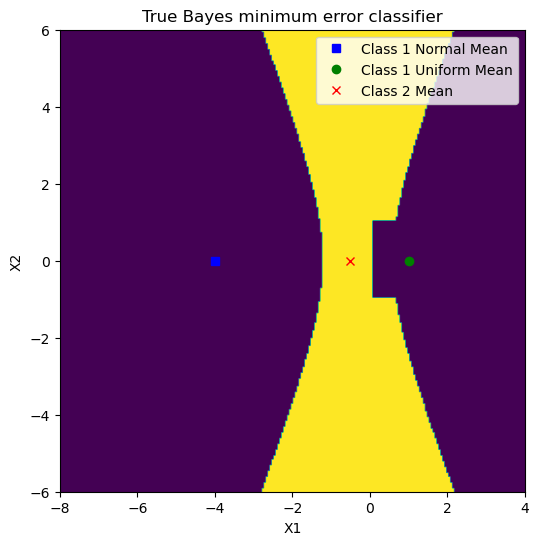

In [6]:
plot_boundary()

In [8]:
def generate_data(N):
    # define three mean value
    m1 = np.array([-4, 0])    
    m2 = np.array([-0.5, 0])
    
    cov_1 = np.array([[4, 0],[0, 1]])        
    cov_2 = np.array([[0.16, 0],[0, 9]])    
#     x, y = np.random.multivariate_normal(m1_nor, cov_1, 5000).T
#     print(x, y)
    data = np.empty((N, 3))
    for i in range(N):
        # draw randomly between 𝑆1 and 𝑆2
        label = np.random.choice([1, 2], p = [0.5, 0.5])
        if label == 1:
            # first draw randomly a value of 1 (with probability 0.7) or 2 (with probability 0.3) 
            p = np.random.choice([1, 2], p = [0.7, 0.3]) 
            if p == 1:
                data[i, :2] = np.random.multivariate_normal(m1, cov_1)
            else:
                data[i, :2] = [np.random.uniform(low=0, high=2),np.random.uniform(low=-1,high=1)]
            data[i, 2] = 1 
            
        else:
            data[i, :2] = np.random.multivariate_normal(m2, cov_2)
            data[i, 2] = 2
    return data

In [9]:
data_train = generate_data(20000)
data_test = generate_data(10000)

In [63]:
def plot_dataset(data):
    data = np.copy(data[:2000,:])
    plt.scatter(data[data[:,2] == 1, 0], data[data[:,2] == 1, 1],s = 5, label='Class 1')    
    plt.scatter(data[data[:,2] == 2, 0], data[data[:,2] == 2, 1], s = 5,label='Class 2')
    plt.legend()
    plt.xlabel("X1")    
    plt.ylabel("X2")
    plt.title("The first 2000 points in the full training set")

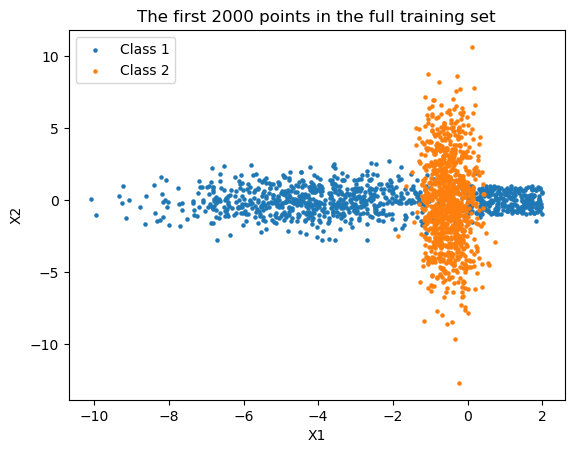

In [64]:
plot_dataset(data_train)

In [10]:
def test_acc(data):
    # define three mean value
    m1_nor = np.array([-4, 0])    
    m1_uni = np.array([1, 0]) ## [(2+0) / 2, (-1+1) / 2]   
    m2 = np.array([-0.5, 0])
    
    cov_1 = np.array([[4, 0],[0, 1]])        
    cov_2 = np.array([[0.16, 0],[0, 9]])  
    
    data_d = np.copy(data[:,:2])
    
    # calculate the distance
    d1 = mahalanobis_dist(data_d, m1_nor, cov_1)
    d2 = mahalanobis_dist(data_d, m2, cov_2)
    
    pred_label = np.zeros(np.shape(data)[0])
    for i in range(np.shape(data)[0]):
        left = 0
        right = 0
        if(data[i,0] >=0 and data[i,0] <= 2 and data[i,1] >=-1 and data[i,1] <= 1):
            left = np.log(0.4+0.25) + np.log(0.3/4) * (-1/2 * np.log(np.linalg.det(cov_1)) - 1/2*d1[i])
            right = -1/2 * np.log(np.linalg.det(cov_2)) - 1/2*d2[i]
    
        else:
            left = -1/2 * np.log(np.linalg.det(cov_1)) - 1/2*d1[i] + np.log(0.7)
            right = -1/2 * np.log(np.linalg.det(cov_2)) - 1/2*d2[i]
        if(left>right):
            pred_label[i] = 1
        else:
            pred_label[i] = 2
    
    print(f"The accuracy is {np.sum(pred_label==data[:,2]) / len(data)}")
            

In [11]:
test_acc(data_test)

The accuracy is 0.9601


In [12]:
def hn(n):
    return (100/n)**0.25

In [13]:
def Gaussian_window_function(data, N):
    return np.sum(np.exp(-1/2 * np.linalg.norm(data / hn(N), axis=1)**2)) / (N * hn(N))

In [14]:
def P_est(N, data):
    class1 = 0
    class2 = 0
    for i in range(N):
        if(data[i, 2] == 1):
            class1 += 1
        else:
            class2 += 1
    print(f"When N = {N}, P_est(S1) = {class1 / N}, P_est(S2) = {class2 / N}")

In [15]:
P_est(200, data_train)
P_est(2000, data_train)
P_est(20000, data_train)

When N = 200, P_est(S1) = 0.46, P_est(S2) = 0.54
When N = 2000, P_est(S1) = 0.493, P_est(S2) = 0.507
When N = 20000, P_est(S1) = 0.4935, P_est(S2) = 0.5065


In [29]:
def plot_estimate(data, ps1, ps2, N):
    # define three mean value
    m1_nor = np.array([-4, 0])    
    m1_uni = np.array([1, 0]) ## [(2+0) / 2, (-1+1) / 2]   
    m2 = np.array([-0.5, 0])
    
    cov_1 = np.array([[4, 0],[0, 1]])        
    cov_2 = np.array([[0.16, 0],[0, 9]])    
    
    # set the interval as 0.05
    inc = 0.05
    
    # define the range of x1 and x2 values
    x1 = np.arange(-8, 4, inc)
    x2 = np.arange(-6, 6, inc)
    
     
    # create a meshgrid from x and y values
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.hstack((X1.reshape(X1.shape[0] * X1.shape[1], 1, order='F'),
                    X2.reshape(X2.shape[0] * X2.shape[1], 1, order='F')))  # make (x,y) pairs as a bunch of row vectors.

    xdata_s1 = np.copy(data[data[:,2] == 1])
    xdata_s1 = xdata_s1[:,:2]
    xdata_s2 = np.copy(data[data[:,2] == 2])
    xdata_s2 = xdata_s2[:,:2]
    
    
    pred_label = np.zeros(np.shape(Z)[0])
    for i in range(np.shape(Z)[0]):
        pxs1 = np.sum(np.exp(-1/2 * np.linalg.norm((xdata_s1 - Z[i]) / hn(N), axis=1)**2)) / (N * hn(N))
        pxs2 = np.sum(np.exp(-1/2 * np.linalg.norm((xdata_s2 - Z[i]) / hn(N), axis=1)**2)) / (N * hn(N))
        if(pxs1 * ps1 > pxs2 * ps2):
            pred_label[i] = 1
        else:
            pred_label[i] = 2
            
    # plot the mean points
    plt.figure(figsize=(6, 6))
    plt.plot(m1_nor[0], m1_nor[1], 'bs', label='Class 1 Normal Mean')
    plt.plot(m1_uni[0], m1_uni[1], 'go', label='Class 1 Uniform Mean')
    plt.plot(m2[0], m2[1], 'rx', label='Class 2 Mean')

    image_size = X1.shape
    decisionmap = pred_label.reshape(image_size, order='F')
    plt.imshow(decisionmap, extent=[-8, 4, -6, 6], origin='lower',aspect='auto')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('True Bayes minimum error classifier')
    plt.legend()
    plt.show()


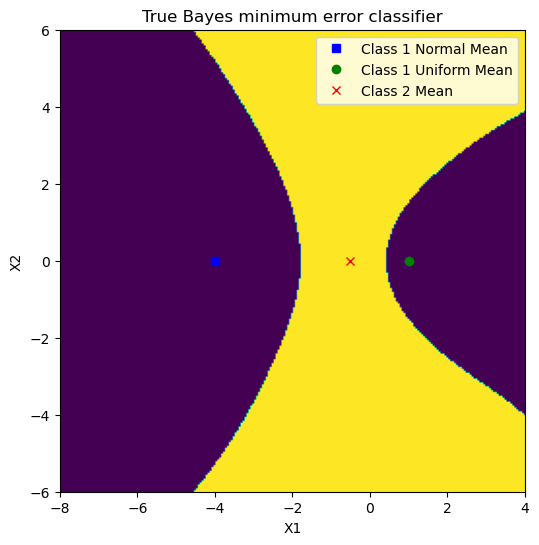

In [30]:
plot_estimate(data_train, 0.46, 0.54, 200)

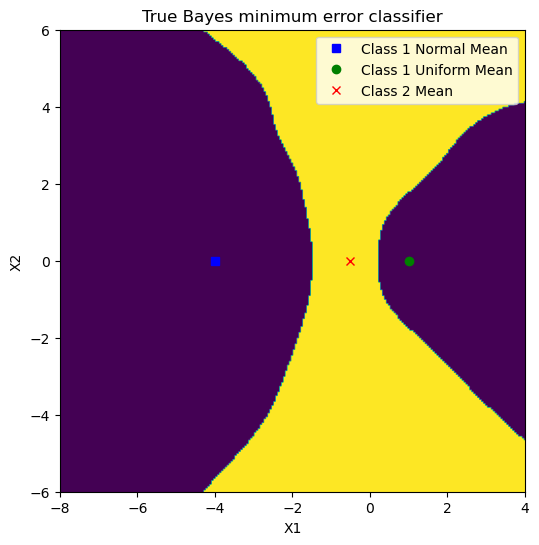

In [19]:
plot_estimate(data_train, 0.493, 0.507, 2000)

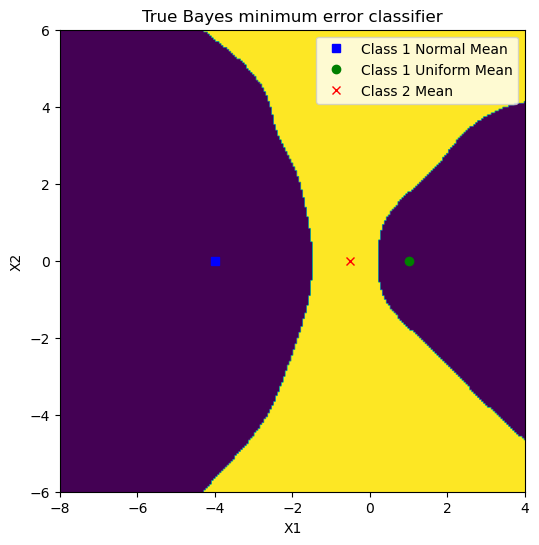

In [20]:
plot_estimate(data_train, 0.4935, 0.5065, 2000)

In [21]:
def test(ps1, ps2, N, data):
    
    data_copy = np.copy(data[:,:2])
    
    xdata_s1 = np.copy(data[data[:,2] == 1])
    xdata_s1 = xdata_s1[:,:2]
    xdata_s2 = np.copy(data[data[:,2] == 2])
    xdata_s2 = xdata_s2[:,:2]
    
    
    pred_label = np.zeros(np.shape(data)[0])
    for i in range(np.shape(data)[0]):
        pxs1 = np.sum(np.exp(-1/2 * np.linalg.norm((xdata_s1 - data_copy[i]) / hn(N), axis=1)**2)) / (N * hn(N))
        pxs2 = np.sum(np.exp(-1/2 * np.linalg.norm((xdata_s2 - data_copy[i]) / hn(N), axis=1)**2)) / (N * hn(N))
        if(pxs1 * ps1 > pxs2 * ps2):
            pred_label[i] = 1
        else:
            pred_label[i] = 2
    print(f"The accuracy is {np.sum(pred_label==data[:,2]) / len(data)}")
    

In [22]:
test(0.54, 0.46, 200, data_test)

The accuracy is 0.9395


In [23]:
test(0.504, 0.496, 2000, data_test)

The accuracy is 0.9465


In [24]:
test(0.50445, 0.4955, 20000, data_test)

The accuracy is 0.9543
